In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
# Disable Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

In [3]:
data = pd.read_csv("pfizer_vaccine.csv")

In [4]:
data

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8077,1381891596459859969,Prof. Guy Ashton,NaN,Professor of tropical medicine and infectious ...,2020-03-18 07:59:46,238,249,32754,False,2021-04-13 08:46:45,"Off for my second vaccine, then work. 👋💉\n#Cur...","['Cured', 'PfizerBioNTech']",Twitter for Android,0,4,False
8078,1381873083598839816,theSun,Petaling Jaya,Breaking news updates from the website of Mala...,2009-07-29 01:58:44,143996,462,197,False,2021-04-13 07:33:11,“When” appears to be a million-dollar question...,NaN,Twitter for iPhone,0,0,False
8079,1381839418055532546,Anisha Sindher,Hong Kong S.A.R,A Wander Woman & a (M)Ad woman: Senior Copywri...,2010-11-30 05:24:01,105,66,2766,False,2021-04-13 05:19:25,Second #PfizerBioNTech vaccine shot done! Than...,"['PfizerBioNTech', 'HongKong', 'HKTwitterGetsV...",Twitter for iPhone,0,4,False
8080,1381824559519723523,Anisha Sindher,Hong Kong S.A.R,A Wander Woman & a (M)Ad woman: Senior Copywri...,2010-11-30 05:24:01,105,66,2766,False,2021-04-13 04:20:22,Second #PfizerBioNTech vaccine is officially i...,"['PfizerBioNTech', 'HongKong', 'HK']",Twitter for iPhone,0,3,False


In [5]:
data.isnull().sum()

id                     0
user_name              0
user_location       1630
user_description     506
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            1949
source                 1
retweets               0
favorites              0
is_retweet             0
dtype: int64

In [6]:
data = data.dropna()

In [7]:
data.describe()

,id,user_followers,user_friends,user_favourites,retweets,favorites
count,4.749000e+03,4.749000e+03,4749.000000,4749.000000,4749.000000,4749.000000
mean,1.355333e+18,5.069683e+04,1341.396926,14523.124447,1.545378,9.385555
std,1.280104e+16,3.545440e+05,3453.847283,36379.651961,13.395572,55.280915
min,1.337728e+18,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.344929e+18,1.740000e+02,215.000000,497.000000,0.000000,0.000000
50%,1.352030e+18,6.480000e+02,549.000000,2713.000000,0.000000,1.000000
75%,1.364940e+18,2.728000e+03,1419.000000,12258.000000,1.000000,5.000000
max,1.384788e+18,1.371493e+07,103226.000000,854011.000000,678.000000,1979.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4749 entries, 0 to 8081
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                4749 non-null   int64 
 1   user_name         4749 non-null   object
 2   user_location     4749 non-null   object
 3   user_description  4749 non-null   object
 4   user_created      4749 non-null   object
 5   user_followers    4749 non-null   int64 
 6   user_friends      4749 non-null   int64 
 7   user_favourites   4749 non-null   int64 
 8   user_verified     4749 non-null   bool  
 9   date              4749 non-null   object
 10  text              4749 non-null   object
 11  hashtags          4749 non-null   object
 12  source            4749 non-null   object
 13  retweets          4749 non-null   int64 
 14  favorites         4749 non-null   int64 
 15  is_retweet        4749 non-null   bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 565.8+ KB


In [9]:
nltk.download('stopwords', quiet=True)
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["text"] = data["text"].apply(clean)

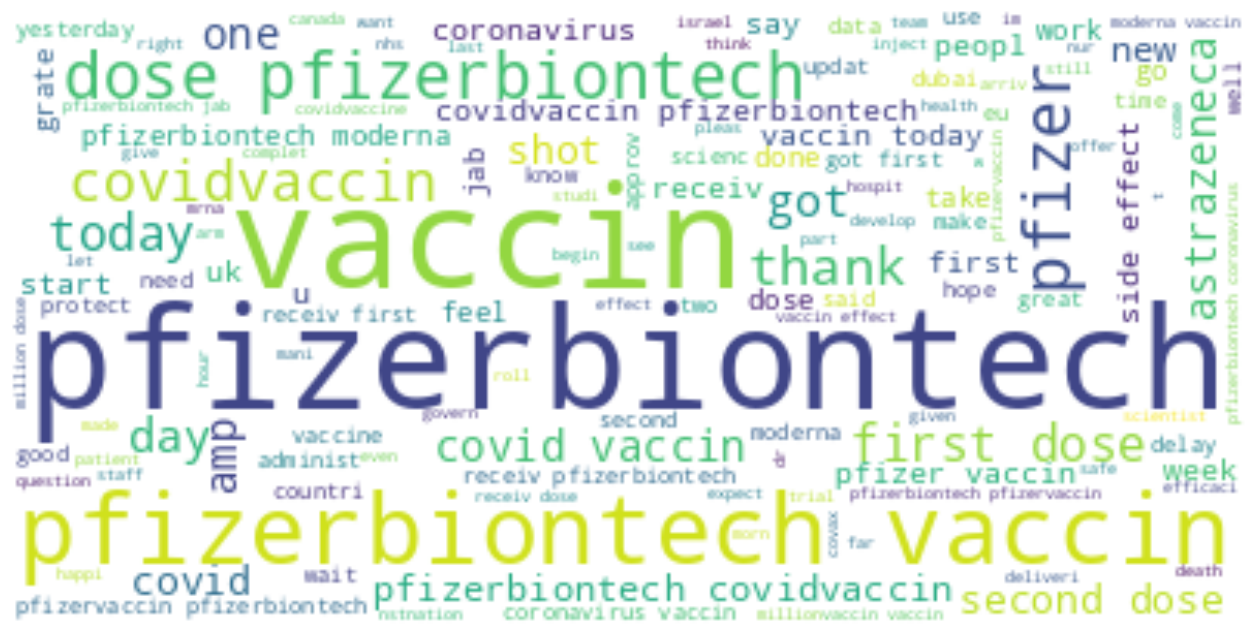

In [10]:
text = "".join(i for i in data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize = (16,20) )
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

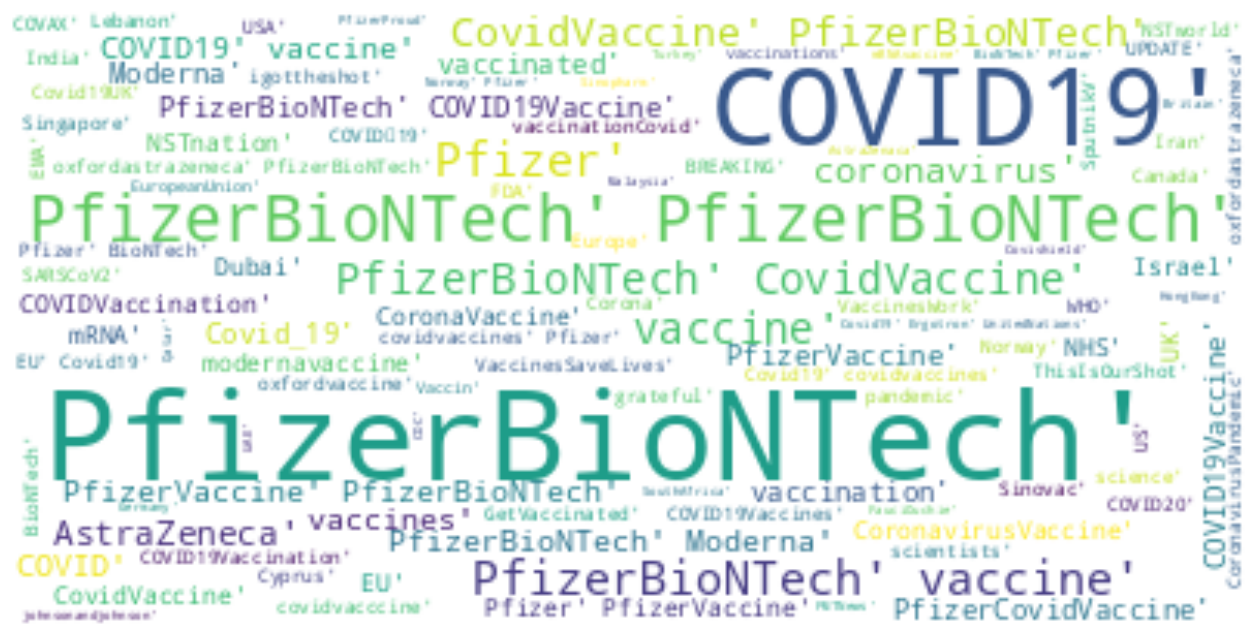

In [11]:
text = "".join(i for i in data.hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize = (16,20) )
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [12]:
data["user_verified"].value_counts()

False    4169
True      580
Name: user_verified, dtype: int64

In [13]:
nltk.download("vader_lexicon", quiet = True)

True

In [14]:
sentiments = SentimentIntensityAnalyzer()

In [15]:
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["text"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["text"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["text"]]
data = data[["text", "Positive", "Negative", "Neutral"]]

In [16]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def result(a, b, c):
    if (a > b) and (a > c):
        return ("Positive 🎉😍")
    elif (b > a) and (b > c):
        return ("Negative 👿😠")
    else:
        return ("Neutral 😐😞")

(result(x,y,z))

'Neutral 😐😞'

In [ ]:
print(f"Positive: {x}")
print(f"Negative: {y}")
print(f"Neu: {z}")